In [20]:
import cv2
import os
import numpy as np
import matplotlib.pyplot as plt

In [21]:
from os import listdir
from os.path import isfile, join
import numpy
import cv2
mypath="C:\\Users\\KBCI\\data\\data_macarons_M"
mypath2 = "C:\\Users\\KBCI\\data\\data_waffle_M"


onlyfiles = [f for f in listdir(mypath) if isfile(join(mypath, f))]
onlyfiles2 = [f for f in listdir(mypath2) if isfile(join(mypath2, f))]


macaron = numpy.empty(len(onlyfiles), dtype=object)
waffle = numpy.empty(len(onlyfiles2), dtype=object)


r_macaron = numpy.empty(len(onlyfiles), dtype=object)
r_waffle = numpy.empty(len(onlyfiles2), dtype=object)


for n in range(0, len(onlyfiles)):
    macaron[n] = cv2.imread(join(mypath, onlyfiles[n]), cv2.IMREAD_COLOR)
for n in range(0, len(onlyfiles2)):
    waffle[n] = cv2.imread(join(mypath2, onlyfiles2[n]), cv2.IMREAD_COLOR)


for i in range(len(macaron)):
    b, g, r = cv2.split(macaron[i])
    macaron[i] = cv2.merge([r, g, b])
for i in range(len(waffle)):
    b, g, r = cv2.split(waffle[i])
    waffle[i] = cv2.merge([r, g, b])


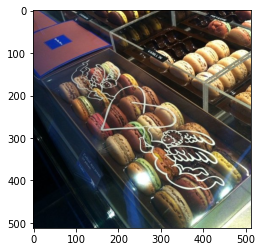

In [22]:
plt.imshow(macaron[0])

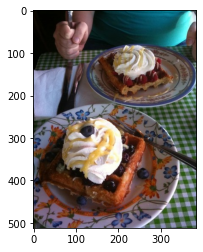

In [23]:
plt.imshow(waffle[0])

In [24]:
for n in range(0, len(onlyfiles)):
    r_macaron[n] = cv2.resize(macaron[n], dsize=(50, 50), interpolation=cv2.INTER_AREA)
for n in range(0, len(onlyfiles2)):
    r_waffle[n] = cv2.resize(waffle[n], dsize=(50, 50), interpolation=cv2.INTER_AREA)


In [26]:
lis_macaron = []
lis_waffle = []


y = []
for i in range(len(r_macaron)):
    lis_macaron.append(r_macaron[i].flatten())
    y.append(0)
for i in range(len(r_waffle)):
    lis_waffle.append(r_waffle[i].flatten())
    y.append(1)



In [27]:
import keras

In [28]:
import sklearn.svm as svm
import sklearn.metrics as mt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC

In [29]:
X = lis_macaron + lis_waffle #+ lis_apple
# nx = r_macaron + r_waffle
# nx = np.array(nx)
X = np.array(X)
y = np.array(y)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [30]:
X_train = X_train.reshape(-1,50*50*3)/255
X_test = X_test.reshape(-1,50*50*3)/255
print(y_test.shape)
print(X_test.shape)

(400,)
(400, 7500)


In [31]:
y_test

array([1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1,
       0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0,
       0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1,
       0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1,
       0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0,
       0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0,

In [32]:
from keras.models import Sequential
from keras.layers import Dense

in_size = 50*50*3 

num_classes = 10

#[1]
model = Sequential()
#[2]
model.add(Dense(512, activation='relu', input_shape=(in_size,)))
#[3]
model.add(Dense(num_classes,activation='softmax'))

In [33]:
model.compile(
    #[1]
    loss = 'sparse_categorical_crossentropy',
    #[2]
    optimizer = 'adam',
    #[3]
    metrics = ['accuracy']
)

In [34]:
hist = model.fit(X_train, y_train,
                batch_size=20, 
                epochs = 35,
                verbose=1,
                validation_data=(X_test, y_test))

Epoch 1/35
80/80 [==============================] - 2s 28ms/step - loss: 1.9888 - accuracy: 0.5107 - val_loss: 0.9199 - val_accuracy: 0.5600
Epoch 2/35
80/80 [==============================] - 2s 24ms/step - loss: 0.9953 - accuracy: 0.6007 - val_loss: 1.1229 - val_accuracy: 0.5650
Epoch 3/35
80/80 [==============================] - 2s 24ms/step - loss: 0.9825 - accuracy: 0.6319 - val_loss: 0.7770 - val_accuracy: 0.5800
Epoch 4/35
80/80 [==============================] - 2s 24ms/step - loss: 0.8536 - accuracy: 0.6230 - val_loss: 0.9027 - val_accuracy: 0.5775
Epoch 5/35
80/80 [==============================] - 2s 24ms/step - loss: 0.6408 - accuracy: 0.6903 - val_loss: 0.8277 - val_accuracy: 0.6075
Epoch 6/35
80/80 [==============================] - 2s 24ms/step - loss: 0.6975 - accuracy: 0.6668 - val_loss: 0.7863 - val_accuracy: 0.6125
Epoch 7/35
80/80 [==============================] - 2s 24ms/step - loss: 0.6894 - accuracy: 0.6733 - val_loss: 1.1691 - val_accuracy: 0.5300
Epoch 8/35
80

In [35]:
score = model.evaluate(X_test, y_test, verbose=1)
print('정답률 = ', score[1],'loss=', score[0])

13/13 [==============================] - 0s 9ms/step - loss: 1.0049 - accuracy: 0.5700
정답률 =  0.5699999928474426 loss= 1.0048648118972778


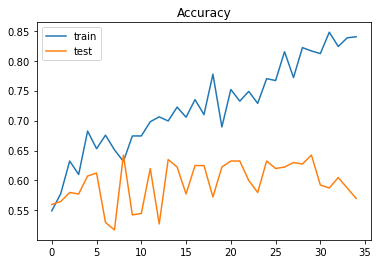

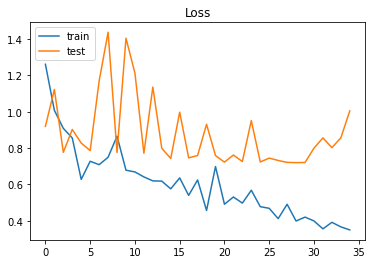

In [36]:
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Accuracy')
plt.legend(['train','test'], loc='upper left')
plt.show()
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Loss')
plt.legend(['train','test'], loc='upper left')
plt.show()